In [3]:
using QuadGK
using Roots

θ_threshold(c,n) = ((n^2 - n)*c)^(1/n)


# Tip function
function t(c,θ,n)
    if (θ < θ_threshold(c,n))
        return 0
    else
        return (1/2)*(θ^n/n - (n-1)*c)
    end
end

function t̂(c,n)
    f(θ) = t(c,θ,n)
    return f
end
    
function expected_tip(n)
    function g(c)
        I,est = quadgk(t̂(c,n),0,1,rtol = 1e-8)
        return I-c
    end
    return find_zero(g, (0,1), Bisection())
end

for i in 1:10
    print(n*expected_tip(i),"\n")
end


UndefVarError: UndefVarError: n not defined

┌ Warning: Indices Base.OneTo(2) of attribute `linewidth` does not match data indices 1:100.
└ @ Plots /Users/elijahfox/.julia/packages/Plots/nqFaB/src/utils.jl:141
┌ Warning: Indices Base.OneTo(2) of attribute `linewidth` does not match data indices 2:100.
└ @ Plots /Users/elijahfox/.julia/packages/Plots/nqFaB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `linewidth` vector do not match data indices.
│ If you intend elements of `linewidth` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector instead, and use a row vector for `linewidth`. Legend entries
│ may be suppressed by passing an empty label.
│ For example,
│     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], linewidth=[1 2])
└ @ Plots /Users/elijahfox/.julia/packages/Plots/nqFaB/src/utils.jl:143
┌ Warning: Indices Base.OneTo(2) of attribute `linewidth` does not match data indices 1:100.
└ @ Plots /Users/elijahfox/.julia/packages/Plots/nqFaB/src/uti

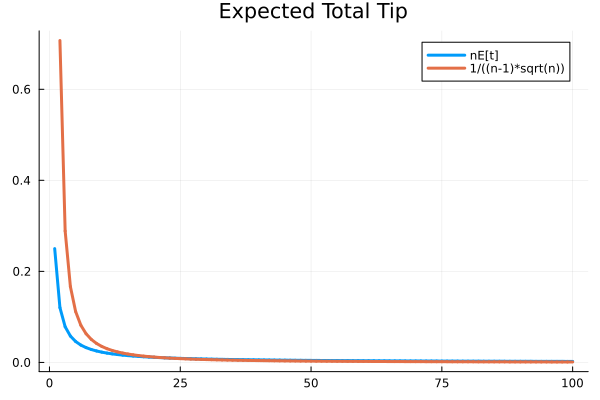

┌ Warning: Indices Base.OneTo(2) of attribute `linewidth` does not match data indices 2:100.
└ @ Plots /Users/elijahfox/.julia/packages/Plots/nqFaB/src/utils.jl:141
┌ Info: Data contains NaNs or missing values, and indices of `linewidth` vector do not match data indices.
│ If you intend elements of `linewidth` to apply to individual NaN-separated segments in the data,
│ pass each segment in a separate vector instead, and use a row vector for `linewidth`. Legend entries
│ may be suppressed by passing an empty label.
│ For example,
│     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], linewidth=[1 2])
└ @ Plots /Users/elijahfox/.julia/packages/Plots/nqFaB/src/utils.jl:143
┌ Warning: Indices Base.OneTo(2) of attribute `linewidth` does not match data indices 1:100.
└ @ Plots /Users/elijahfox/.julia/packages/Plots/nqFaB/src/utils.jl:141
┌ Warning: Indices Base.OneTo(2) of attribute `linewidth` does not match data indices 2:100.
└ @ Plots /Users/elijahfox/.julia/packages/Plots/nqFaB/src/uti

In [4]:
using Plots
X = 1:100

s(n) = 1/((n-1)*sqrt(n))

plot(X,[X.*map(expected_tip,X),map(s,X)],lw = [3,3] , labels = ["nE[t]" "1/((n-1)*sqrt(n))"], title = "Expected Total Tip")